# Analysis dataset

This notebook is created to analyze the dataset I created in the notebook living_population. Here is where I get all the data with errors hopefully. 

Ylva Götberg

18 October 2019

In [3]:
# Import some packages
import numpy as np
import scipy
from scipy import stats  
import matplotlib.pyplot as plt
import copy
from scipy.optimize import curve_fit
from scipy.special import factorial
import os
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, GeocentricTrueEcliptic
from astropy.coordinates import Angle, Latitude, Longitude
import astropy.units as u
import astropy.constants as const
%matplotlib inline
# This one makes LaTeX in the plots
from matplotlib import rc
fsize = 20
rc('font',**{'family':'serif','serif':['Times'],'size'   : fsize})
rc('text', usetex=True)

import sys
sys.path.insert(0, '../')
#from GetColumnMESA import GetColumnMESA
#from extrapolate import extrapolate
G = const.G.to('AU3/(M_sun d2)').value
pc_SI = u.pc.to(u.m)
AU_SI = u.AU.to(u.m)
c_SI = const.c.value
c_AUday = c_SI*u.m.to(u.AU)/(u.s.to(u.day))
h_SI = const.h.value
kB_SI = const.k_B.value
b_wien_SI = const.b_wien.value
RSun_SI = u.R_sun.to(u.m)
G_cgs = const.G.to('cm^3 g^-1 s^-2').value

In [5]:
# This I believe is an estimate for rotation rates of stripped stars as
# expected from first Fuller+19 and then Spruit dynamo
Omega = 10 ** (-5.2)  # radians/second
Omega = Omega / (2.0 * np.pi)  # s^-1
print (Omega)
Rstar = 0.8 * u.R_sun.to(u.km)  # Radius of star in km
vrot = Rstar * Omega
print (vrot)

Omega_new = 1.0 / (200.0 * 24.0 * 3600.0)
Omega_TS = 1.0 / (2.0 * 24.0 * 3600.0)
print (Omega_new, Omega_TS)
vrot_TS = Rstar * (Omega_TS * 100.0)
print (vrot_TS)

1.0041998025415852e-06
0.5588974421025447
5.787037037037037e-08 5.787037037037037e-06
322.0833333333333


In [6]:
a = np.logspace(2,3.5,100)*u.R_sun.to(u.AU)
m1 = 4.
m2 = 1.4

P = np.sqrt(4.*(np.pi**2.)*(a**3.)/(G*(m1+m2)))
print (P)

P = 0.1   # days
a = (P*G*(m1+m2)/(4.*(np.pi**2.)))**(1./3.)
Jorb = np.sqrt(G*a/(m1+m2))*m1*m2
print (Jorb)

Pdot_GW_div_P = (-96./5.)*((G**3.)/(c_AUday**5.))*(m1*m2*(m1+m2)/(a**4.))
print (Pdot_GW_div_P)

[   49.8478503     52.5259247     55.34787857    58.32144184    61.45475971
    64.756415      68.23545163    71.90139941    75.76430013    79.83473509
    84.12385406    88.64340582    93.40577038    98.42399285   103.71181918
   109.28373384   115.15499946   121.34169867   127.86077812   134.73009494
   141.96846562   149.59571756   157.63274341   166.10155825   175.02535994
   184.42859263   194.33701374   204.77776451   215.77944432   227.37218908
   239.58775374   252.45959928   266.02298437   280.31506195   295.37498101
   311.24399381   327.9655689    345.58551014   364.15208225   383.71614294
   404.33128226   426.05396938   448.94370727   473.0631957    498.47850299
   525.25924697   553.4787857    583.21441837   614.5475971    647.56414999
   682.3545163    719.01399408   757.64300131   798.3473509    841.23854056
   886.43405822   934.05770383   984.2399285   1037.11819182  1092.8373384
  1151.54999461  1213.41698668  1278.60778121  1347.30094939  1419.68465616
  1495.957175

There is a file with the total number of systems

In [3]:
loc_run = '/data002/ygoetberg/scripts/GW/10yr_notides_long/'

filename = loc_run+'pop_full.txt'
#filename = '/data002/ygoetberg/scripts/GW/standard_run/pop_full.txt'
#filename = '/data002/ygoetberg/scripts/GW/4yr_run/pop_full.txt'
data = np.loadtxt(filename,skiprows=1)
N_WD = data[:,1]
N_NS = data[:,2]
N_BH = data[:,3]

/data002/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/data002/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/data002/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


87253.8 62.55525557457183
5174.2 62.555255574571824
0.0 0.0


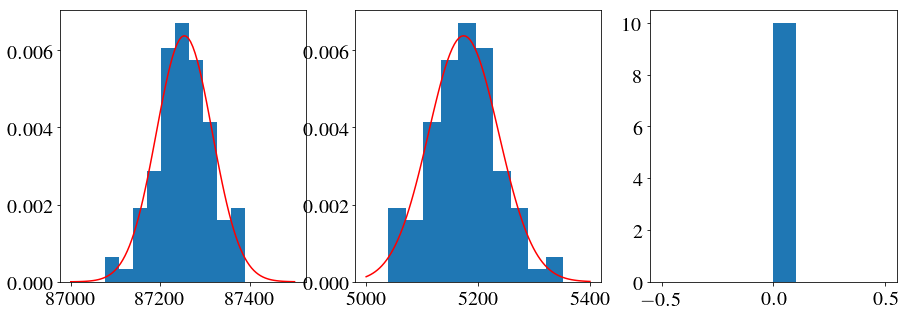

In [4]:
ww = 15
hh = 5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(ww,hh))

N = [N_WD, N_NS, N_BH]
n = 0
for ax in (ax1,ax2,ax3):
    ax.hist(N[n],normed=True)
    m, s = stats.norm.fit(N[n])
    xt = ax.get_xticks()
    xmin, xmax = min(xt), max(xt)  
    lnspc = np.linspace(xmin, xmax, 100)
    pdf_g = stats.norm.pdf(lnspc, m, s)
    ax.plot(lnspc, pdf_g,'r-')
    print m, s

    n=n+1
    


### Get the data

In [5]:
filename = loc_run+'pop_individuals.txt'
data = np.genfromtxt(filename,dtype=str)
s_nbr = data[:,0].astype(np.float)
mstrip = data[:,1].astype(np.float)
mco = data[:,2].astype(np.float)
Porb = data[:,3].astype(np.float)
dist = data[:,4].astype(np.float)
h_c = data[:,5].astype(np.float)
f_GW = data[:,6].astype(np.float)
SNR = data[:,7].astype(np.float)
MT = data[:,8]
fdot = data[:,9].astype(np.float)

In [164]:
np.sum(SNR>7.)/100.

1.37

In [22]:
filename = loc_run+'pop_SNR4.txt'
data = np.genfromtxt(filename,dtype=str)
s_nbr=data[:,0].astype(np.float)
mstrip = data[:,1].astype(np.float)
mco = data[:,2].astype(np.float)
dist = data[:,3].astype(np.float)
h_c = data[:,4].astype(np.float)
f_GW = data[:,5].astype(np.float)
SNR = data[:,6].astype(np.float)
MT = data[:,7]
x = data[:,8].astype(np.float)
y = data[:,9].astype(np.float)

In [62]:
# Calculate the direction of the sources
x_sun = 8.
y_sun = 0.
xtmp = x-x_sun
ytmp = copy.copy(y)
dtmp = np.sqrt(xtmp**2. + ytmp**2.)
#theta = np.arctan(ytmp/xtmp)
theta = np.arcsin(ytmp/dtmp)
ind = (xtmp<0)*(ytmp>0)
theta[ind]= theta[ind]+np.pi/2.
ind = (xtmp<0)*(ytmp<0)
theta[ind] = theta[ind]-np.pi/2.

# This is the same angle, with 180 towards the Galactic center and in degrees
Gal_l = 180.+theta*360./(2.*np.pi)
Gal_l[Gal_l > 180.] = Gal_l[Gal_l > 180.]-360.

array([ 64.41685936,  64.1344493 , 199.00013422, ..., 198.8076438 ,
        44.34820773,  13.52132687])

### Properties

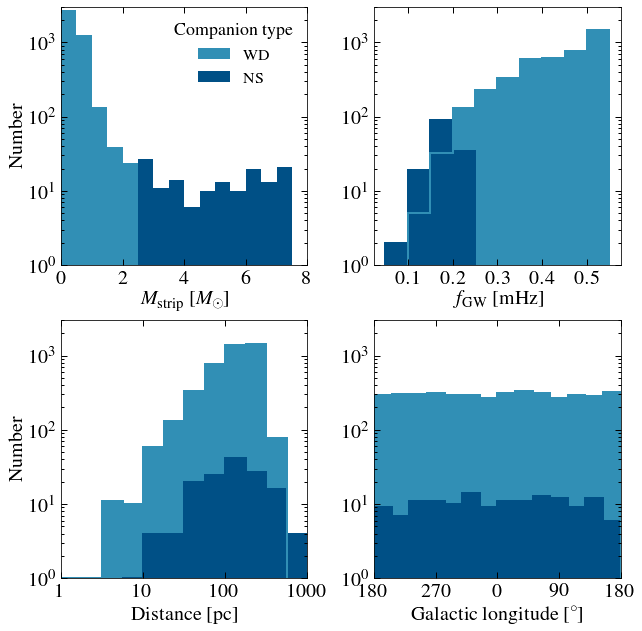

In [69]:
clr_WD = np.array([49,143,181])/255.
clr_NS = np.array([0,80,134])/255.

ind_WD = (SNR > 4.)*(mco<=0.6)
ind_NS = (SNR > 4.)*(mco==1.4)

ww = 9
hh = 9
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(ww,hh))
fig.tight_layout()

# Mass distribution
bins = np.linspace(0,8,17)
ax1.hist(mstrip[ind_WD],facecolor=clr_WD,bins=bins,label='WD')
ax1.hist(mstrip[ind_NS],facecolor=clr_NS,bins=bins,label='NS')

ax1.set_yscale('log')
#ax1.set_yticks([1,10,100,1000])
#ax1.set_yticklabels(['$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^{0}$'])
ax1.set_ylim([1,3e3])
ax1.set_xlabel('$M_{\\mathrm{strip}}$ [$M_{\\odot}$]')
ax1.set_ylabel('Number')
legend = ax1.legend(loc=0,fontsize=0.8*fsize,edgecolor='none')
legend.set_title('Companion type',prop={'size':0.9*fsize})
ax1.set_xlim([0,8])
ax1.set_xticks([0,2,4,6,8])


# Gravitational wave frequency
bins = np.arange(0.05,0.6,0.05)
ax2.hist(f_GW[ind_WD]*1e3,facecolor=clr_WD,bins=bins)
ax2.hist(f_GW[ind_NS]*1e3,facecolor=clr_NS,edgecolor=clr_NS,histtype='stepfilled',bins=bins,lw=2)
ax2.hist(f_GW[ind_WD]*1e3,facecolor='none',edgecolor=clr_WD,histtype='stepfilled',bins=bins,lw=2)

ax2.set_xlabel('$f_{\\mathrm{GW}}$ [mHz]')
ax2.set_yscale('log')
ax2.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax2.set_ylim([1,3e3])


# Distance
bins=np.linspace(0,3,13)
ax3.hist(np.log10(dist[ind_WD]),facecolor=clr_WD,bins=bins)
ax3.hist(np.log10(dist[ind_NS]),facecolor=clr_NS,edgecolor=clr_NS,histtype='stepfilled',lw=2,bins=bins)
ax3.hist(np.log10(dist[ind_WD]),facecolor='none',edgecolor=clr_WD,histtype='stepfilled',bins=bins,lw=2)

ax3.set_yscale('log')
ax3.set_ylim([1,3e3])
ax3.set_xlim([0,3])
ax3.set_xticks([0,1,2,3])
ax3.set_xticklabels([1,10,100,1000])
ax3.set_xlabel('Distance [pc]')
ax3.set_ylabel('Number')


# Location in the Galactic disk
bins=np.linspace(-180,180,15)

ax4.hist(Gal_l[ind_WD],facecolor=clr_WD,bins=bins)
ax4.hist(Gal_l[ind_NS],facecolor=clr_NS,edgecolor=clr_NS,histtype='stepfilled',lw=2,bins=bins)
ax4.hist(Gal_l[ind_WD],facecolor='none',edgecolor=clr_WD,histtype='stepfilled',bins=bins,lw=2)

ax4.set_yscale('log')
ax4.set_ylim([1,3e3])

ax4.set_xlim([-180,180])
ax4.set_xticks([-180,-90,0,90,180])
ax4.set_xticklabels([180,270,0,90,180])
ax4.set_xlabel('Galactic longitude [$^{\\circ}$]')

ax4.text()

for ax in (ax1,ax2,ax3,ax4):
    ax.tick_params(direction="in", which='both')
    ax.tick_params('both', length=6, width=1,which='major')
    ax.tick_params('both', length=3, width=1,which='minor')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

#fig.savefig('prop.png',format='png',dpi=300,bbox_inches='tight',pad_inches=0.1)

#### Mass distribution

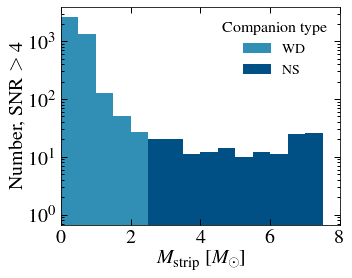

In [166]:
ww = 5
hh = 4
fig, ax = plt.subplots(1,1,figsize=(ww,hh))

clr_WD = np.array([49,143,181])/255.
clr_NS = np.array([0,80,134])/255.

ind_WD = (SNR > 4.)*(mco<=0.6)
ind_NS = (SNR > 4.)*(mco==1.4)
bins = np.linspace(0,8,17)
ax.hist(mstrip[ind_WD],facecolor=clr_WD,bins=bins,label='WD')
ax.hist(mstrip[ind_NS],facecolor=clr_NS,bins=bins,label='NS')
#ax.hist(mstrip)

ax.set_yscale('log')
#ax.set_yticklabels([])
ax.set_xlabel('$M_{\\mathrm{strip}}$ [$M_{\\odot}$]')
ax.set_ylabel('Number, SNR $>4$')
legend = ax.legend(loc=0,fontsize=0.7*fsize,edgecolor='none')
legend.set_title('Companion type',prop={'size':0.8*fsize})


ax.tick_params(direction="in", which='both')
ax.tick_params('both', length=6, width=1,which='major')
ax.tick_params('both', length=3, width=1,which='minor')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim([0,8])

fig.savefig(loc_run+'M_distr.pdf',format='pdf',bbox_inches='tight',pad_inches=0.1)

#### Distance

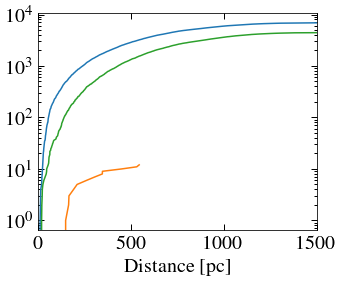

In [9]:
ww = 5
hh = 4
fig, ax = plt.subplots(1,1,figsize=(ww,hh))

clr_WD = np.array([49,143,181])/255.
clr_NS = np.array([0,80,134])/255.

ind_MT = MT == 'True'

ax.plot(np.sort(dist),np.arange(len(dist)))
#ax.plot(np.sort(dist),np.linspace(0,1,len(dist)))
#ax.plot(np.sort(dist[ind_NS]),np.linspace(0,1,len(dist[ind_NS])))
ax.plot(np.sort(dist[ind_NS]),np.arange(len(dist[ind_NS])))
ax.plot(np.sort(dist[ind_MT]),np.arange(len(dist[ind_MT])))

ax.tick_params(direction="in", which='both')
ax.tick_params('both', length=6, width=1,which='major')
ax.tick_params('both', length=3, width=1,which='minor')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.set_xlim([0,1500])
#ax.set_ylim([0,1])
ax.set_xlabel('Distance [pc]')
#ax.set_ylabel('')
ax.set_yscale('log')

In [7]:
n = 1 
nbr_sys = []
nbr_sim = []
for i in range(1,len(s_nbr)):
    if s_nbr[i] == s_nbr[i-1]:
        n = n+1
    else:
        nbr_sys.append(n)
        nbr_sim.append(s_nbr[i-1])
        n = 0
        
nbr_sys.append(n)
nbr_sim.append(s_nbr[-1])

## Count number of systems

In [8]:
nbr_runs = 100
SNR_lim = 4.
nbr_strip_BH = [None]*nbr_runs
nbr_strip_NS = [None]*nbr_runs
nbr_strip_WD = [None]*nbr_runs
for i in range(1,nbr_runs+1):
    ind = (s_nbr == i)*(SNR > SNR_lim)
    nbr_strip_BH[i-1] = np.sum(mco[ind] == 5.)
    nbr_strip_NS[i-1] = np.sum(mco[ind] == 1.4)
    nbr_strip_WD[i-1] = np.sum(mco[ind] <= 0.6)

In [9]:
np.sum(np.array(nbr_strip_NS) == 0), np.sum(np.array(nbr_strip_NS) > 0)

(87, 13)

In [10]:
i = 66
ind = (s_nbr==(i+1))*(SNR > 4.)
mstrip[ind], mco[ind], MT[ind], SNR[ind]

(array([0.88298079, 1.04423911, 0.78514739, 0.36511372, 0.87313029,
        2.58936552]),
 array([0.6       , 0.6       , 0.6       , 0.36511372, 0.6       ,
        1.4       ]),
 array(['False', 'False', 'True', 'True', 'False', 'False'], dtype='|S22'),
 array([ 5.08530987,  8.75662961,  5.58470098,  4.30943834, 10.83698028,
         4.67909767]))

In [11]:
nbr_strip_NS[81]

0

In [12]:
# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

4.1 1.9416487838947598
[0.16309189] [0.40384636]
[4.18763225] [2.04637051]


/data002/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/data002/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


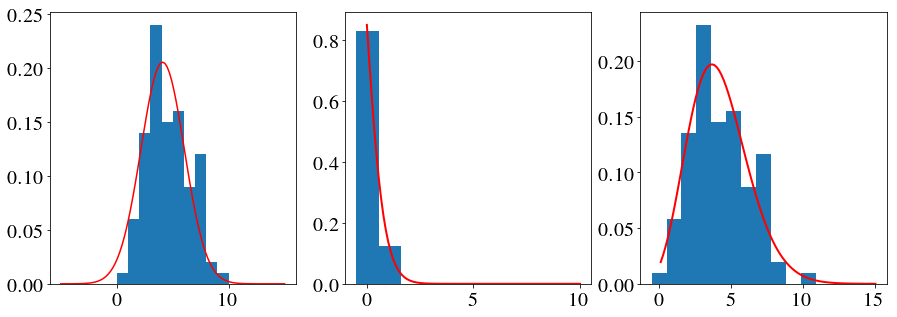

In [13]:
ww = 15
hh = 5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(ww,hh))

#ax1.hist(nbr_strip_WD)
#entries, bin_edges, patches = ax1.hist(nbr_strip_WD, bins=20, range=[14.5,55.5], normed=True)
# calculate binmiddles
#bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
# fit with curve_fit
#parameters, cov_matrix = curve_fit(poisson, bin_middles, entries)
# plot poisson-deviation with fitted parameter
#x_plot = np.linspace(14, 55, 100)
#ax1.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
m, s = stats.norm.fit(nbr_strip_WD)
print m, s
ax1.hist(nbr_strip_WD,normed=True)

xt = ax1.get_xticks()
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, 100)
pdf_g = stats.norm.pdf(lnspc, m, s)
ax1.plot(lnspc, pdf_g,'r-')


#ax2.hist(nbr_strip_NS)
entries, bin_edges, patches = ax2.hist(nbr_strip_NS, bins=10, range=[-0.5, 10], normed=True)
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries)
x_plot = np.linspace(-1, 10, 100)
ax2.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
print parameters, np.sqrt(parameters)


entries, bin_edges, patches = ax3.hist(np.array(nbr_strip_WD), bins=15, range=[-0.5, 15], normed=True)
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries)
x_plot = np.linspace(-1, 15, 100)
ax3.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
print parameters, np.sqrt(parameters)

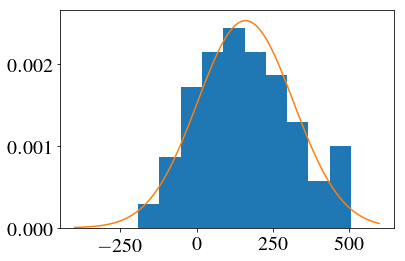

In [7]:

import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

In [8]:
#np.min(nbr_strip_WD), np.max(nbr_strip_WD)
np.min(nbr_strip_NS), np.max(nbr_strip_NS)
#np.min(nbr_strip_BH), np.max(nbr_strip_BH)


(0, 3)

## Frequency range

In [14]:
fmin_strip_BH = np.zeros(int(s_nbr[-1]))
fmax_strip_BH = np.zeros(int(s_nbr[-1]))
fmin_strip_NS = np.zeros(int(s_nbr[-1]))
fmax_strip_NS = np.zeros(int(s_nbr[-1]))
fmin_strip_WD = np.zeros(int(s_nbr[-1]))
fmax_strip_WD = np.zeros(int(s_nbr[-1]))
for i in range(int(s_nbr[-1])):
    ind = (s_nbr == (i+1))*(SNR > 2.)*(mco==5.)
    if np.sum(ind)>0:
        fmin_strip_BH[i] = np.min(f_GW[ind])
        fmax_strip_BH[i] = np.max(f_GW[ind])
    ind = (s_nbr == (i+1))*(SNR > 2.)*(mco==1.4)
    if np.sum(ind)>0:
        fmin_strip_NS[i] = np.min(f_GW[ind])
        fmax_strip_NS[i] = np.max(f_GW[ind])
    ind = (s_nbr == (i+1))*(SNR > 2.)*(mco==0.6)
    if np.sum(ind)>0:
        fmin_strip_WD[i] = np.min(f_GW[ind])
        fmax_strip_WD[i] = np.max(f_GW[ind])
    

In [15]:
np.max(fmax_strip_WD[fmax_strip_WD>0])

0.00040075696439770893

In [11]:
print np.max(fmax_strip_NS[fmax_strip_NS>0])
print np.max(fmax_strip_BH[fmax_strip_BH>0])

0.0002208425864697041
0.0002000456288608138


## Distance to the sources

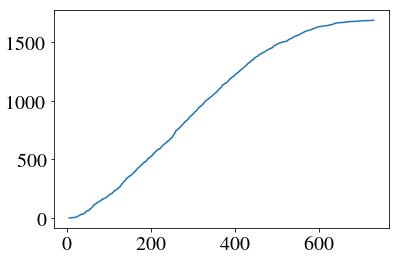

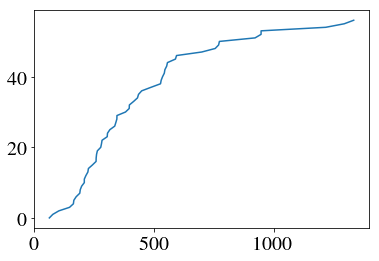

In [16]:
tmp = np.sort(dist[(mco<=0.6)*(SNR>2.)])
plt.plot(tmp,np.arange(len(tmp)))
plt.show()
tmp = np.sort(dist[(mco==1.4)*(SNR>2.)])
plt.plot(tmp,np.arange(len(tmp)))
plt.show()

## Mass transferring systems

In [63]:
MT = MT == 'True'

In [64]:
SNR_lim = 2
#np.sum(MT)/np.float_(len(MT))
# Check how large fraction of the WDs with SNR > 2 that are mass transferring
ind = (mco==0.6)*(SNR>SNR_lim)
print np.sum(MT[ind])/np.float_(np.sum(ind))
ind = (mco==1.4)*(SNR>SNR_lim)
print np.sum(MT[ind])/np.float_(np.sum(ind))
ind = (mco==5)*(SNR>SNR_lim)
print np.sum(MT[ind])/np.float_(np.sum(ind))
ind = (mco>0.6)*(SNR>SNR_lim)
print np.sum(MT[ind])/np.float_(np.sum(ind))


0.8627156789197299
0.1276595744680851
nan
0.1276595744680851


/home/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


## Orbital period

## X-ray emission

For systems that are not currently transferring mass, I follow what Katie suggested. 

In [151]:
# THE BELOW IS COPIED FROM KATIE BREIVIK -- BIG THANKS!

G_SI = 6.67384e-11
c_SI = 2.99792458e8
rsun_in_au = 215.0954
Msun_SI = 1.9891e30
Rsun_SI = 6.955e8
sec_in_year = 3.15569e7


def calculate_Mdot_edd(M_BH):
    """
    Note: this assumes kappa=0.4 cm^2/g
    
    Args:
        M_BH = bh mass in solar masses
        
    Returns:
        Mdot_edd in Msun/yr
    """
    #mp_by_sigmat = 25.1578947368
    #L_edd = 4*np.pi*G*M_BH*Msun*c*mp_by_sigmat
    
    X = 0.2   # hydrogen mass fraction in the wind
    kappa_he = 0.02*(1+X)    # m^2/kg
    L_edd = 4.*np.pi*c_SI*G_SI*M_BH*Msun_SI/kappa_he
    
    Mdot_edd = L_edd/c_SI**2
    return Mdot_edd/Msun_SI*sec_in_year
    

# This is epsilon
def calculate_ADAF_efficiency(Mdot, Mdot_edd, delta=0.01):
    """
    Calculate the mass-luminosity efficiency based on the ADAF
    model of Xie & Yuan (2012), using the piecewise fitting function
    using values provided their Table 1 for their Equation 11.

    Args:
        Mdot : mass transfer rate onto a BH [msun/year]
        Mdot_edd : Eddington mass transfer rate (same units as Mdot)
        delta : (optional) fraction of ionization energy acting on electrons

    Returns:
        epsilon : mass-light conversion efficiency
    """


    M_ratio = Mdot/Mdot_edd

    if not delta in [0.5, 0.1, 0.01, 0.001]:
        print("You must provide an acceptable value for delta.")
        sys.exit(-1)

    if delta == 0.5:
        conds = [M_ratio < 2.9e-5,
                 (M_ratio >= 2.9e-5) & (M_ratio < 3.3e-3),
                 (M_ratio >= 3.3e-3) & (M_ratio < 5.3e-3),
                 M_ratio >= 5.3e-3]
        func_epsilon = [lambda M_ratio: 1.58*(100*M_ratio)**0.65,
                        lambda M_ratio: 0.055*(100*M_ratio)**0.076,
                        lambda M_ratio: 0.17*(100*M_ratio)**1.12,
                        lambda M_ratio: 0.1]

    if delta == 0.1:
        conds = [M_ratio < 9.4e-5,
                 (M_ratio >= 9.4e-5) & (M_ratio < 5.0e-3),
                 (M_ratio >= 5.0e-3) & (M_ratio < 6.6e-3),
                 M_ratio >= 6.6e-3]
        func_epsilon = [lambda M_ratio: 0.12*(100*M_ratio)**0.59,
                        lambda M_ratio: 0.026*(100*M_ratio)**0.27,
                        lambda M_ratio: 0.50*(100*M_ratio)**4.53,
                        lambda M_ratio: 0.1]

    if delta == 1.0e-2:
        conds = [M_ratio < 1.6e-5,
                 (M_ratio >= 1.6e-5) & (M_ratio < 5.3e-3),
                 (M_ratio >= 5.3e-3) & (M_ratio < 7.1e-3),
                 M_ratio >= 7.1e-3]
        func_epsilon = [lambda M_ratio: 0.069*(100*M_ratio)**0.69,
                        lambda M_ratio: 0.027*(100*M_ratio)**0.54,
                        lambda M_ratio: 0.42*(100*M_ratio)**4.85,
                        lambda M_ratio: 0.1]

    if delta == 1.0e-3:
        conds = [M_ratio < 7.6e-5,
                 (M_ratio >= 7.6e-5) & (M_ratio < 4.5e-3),
                 (M_ratio >= 4.5e-3) & (M_ratio < 7.1e-3),
                 M_ratio >= 7.1e-3]
        func_epsilon = [lambda M_ratio: 0.065*(100*M_ratio)**0.71,
                        lambda M_ratio: 0.020*(100*M_ratio)**0.47,
                        lambda M_ratio: 0.26*(100*M_ratio)**3.67,
                        lambda M_ratio: 0.1]
    return np.piecewise(M_ratio, conds, func_epsilon)


def M_acc_fac(m_co, m_donor, r_donor, a, wind_profile, alpha=1.5):
    # Msun, Rsun units
    v_esc = (2*G*(m_donor)*Msun_SI/(r_donor*Rsun_SI))**0.5 
    v_infty = 1.5*v_esc
    if wind_profile:
        beta = 1.
        v_wind = v_infty*((1.-r_donor/a)**beta)
    else:
        v_wind = copy.copy(v_infty)
    
    v_orb = (G_SI*(m_co+m_donor)*Msun_SI/(a*Rsun_SI))**0.5
    
    v_rel_squared = (v_wind**2+v_orb**2)
    v_rel = v_rel_squared**0.5
    
    M_acc_fac = alpha*(G*m_co*Msun_SI)**2/(2*v_rel**3*v_wind*(a*Rsun_SI)**2)
    
    return M_acc_fac

def L_X_ray(m_co, m_donor, r_donor, a, m_dot, r_acc, MT, wind_profile, epsilon=1.0, alpha=1.5):
    
    # m_co, m_donor [msun], a [rsun], m_dot [msun/yr]
    # Same as BSE
    
    # Eq. 36
    M_acc_factor = M_acc_fac(m_co, m_donor, r_donor, a, wind_profile, alpha=1.5)
    #
    M_dot_acc = m_dot*Msun_SI/sec_in_year*M_acc_factor
    # Eq. 83
    
    #ind = MT==True
    M_dot_acc[MT] = m_dot[MT]*Msun_SI/sec_in_year
    
    L_x = epsilon*G_SI*m_co*Msun_SI*M_dot_acc/(r_acc)
    #
    L_x_erg = L_x*1e7
    L_x_sun = L_x/3.8270e33
    return L_x_erg, L_x_sun


Text(0,0.5,'Separation [Rsun]')

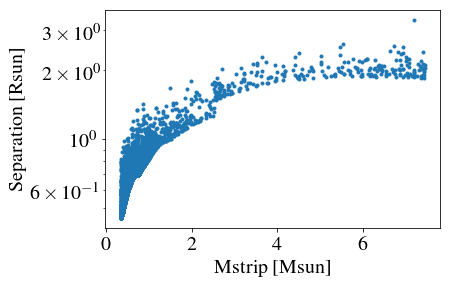

In [106]:
# I need first to calculate the separation between the two stars in the systems
#  Porb [days], G [AU, MSun, days], mco & mstrip [Msun]
a = ((Porb**2)*G*(mco+mstrip)/(4.*(np.pi**2.)))**(1./3.)   # AU
a = a*u.AU.to(u.R_sun)   # Rsun

plt.semilogy(mstrip,a,'.')
plt.xlabel('Mstrip [Msun]')
plt.ylabel('Separation [Rsun]')

I have divided the Mdotwind by 10 to be more realistic.


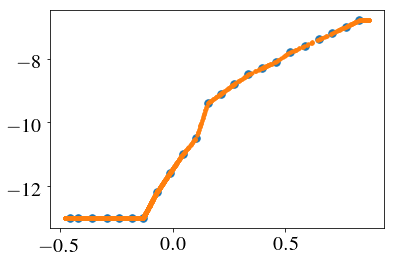

In [107]:
# Then I need an estimate for the wind mass loss rates

# This is what was assumed in the grid in Gotberg+18
mstrip_grid = np.array([0.35,0.38,0.44,0.51,0.58,0.66,0.74,0.85,0.97,1.11,1.27,1.43,1.64,1.88,2.17,2.49,2.87,3.32,3.85,4.45,5.12,5.88,6.72])    # MSun
mdot_grid = 10**np.array([-12.,-12.,-12.,-12.,-12.,-12.,-12.,-11.2,-10.6,-10.,-9.5,-8.4,-8.1,-7.8,-7.5,-7.3,-7.1,-6.8,-6.6,-6.4,-6.2,-6.,-5.8])
# But the mass loss rates are probably about a factor of 10 too high, so I update!
mdot_grid = mdot_grid/10.
print 'I have divided the Mdotwind by 10 to be more realistic.'

plt.plot(np.log10(mstrip_grid),np.log10(mdot_grid),'.',ms=15)

# I think it is best to interpolate in log-log space
mdot_wind = 10**np.interp(np.log10(mstrip), np.log10(mstrip_grid),np.log10(mdot_grid))
plt.plot(np.log10(mstrip),np.log10(mdot_wind),'.')

In [108]:
# Now, I need to know at what distance the accretion should occur
r_acc = np.zeros(len(mco))
# The black holes are assumed to accrete at 3 Schwarzschild radius distance
G_SI = const.G.value
c_SI = const.c.value
r_schwarz = 2.*G_SI*mco[mco==5.]*u.M_sun.to(u.kg)/(c_SI**2.)   # m
r_acc[mco == 5.] = 3.*r_schwarz
# The neutron stars are assumed to have a radius of 10 km and accrete directly on the surface
r_acc[mco == 1.4] = 1e4  # m
# The white dwarfs are assumed to have a radius of 0.005 Rsun
r_acc[mco <= 0.6] = 0.005*u.R_sun.to(u.m)   # m

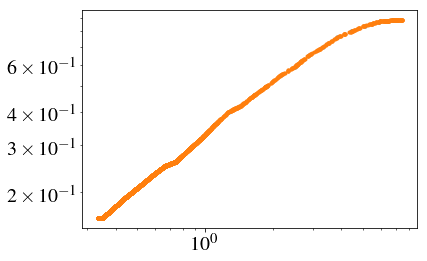

In [109]:
# I need also the radius of the stripped star
rstrip_grid = np.array([0.16,0.17,0.19,0.21,0.23,0.25,0.26,0.29,0.32,0.36,0.40,0.42,0.46,0.50,0.55,0.59,0.65,0.70,0.76,0.80,0.84,0.87,0.88]) # Rsun

plt.loglog(mstrip_grid,rstrip_grid,'.')

rstrip = 10**np.interp(np.log10(mstrip),np.log10(mstrip_grid),np.log10(rstrip_grid))
plt.loglog(mstrip,rstrip,'.')

In [134]:
# Some paramters for the functions
alpha=1.5    # From hydrodynamic simulations of Bondi-Hoyle, between 1 and 2, but weigthed by the 2 in the formula
delta=0.5    # For ADAF - only use if significantly below Eddington (we set < 10% Mdot_Edd)

# I implemented the wind_profile switch - it is assuming a standard beta-law for the wind profile, with beta=1
wind_profile = True   

[0.025765   0.02527551 0.0254649  ... 0.02463871 0.01726576 0.02571597]
0.00033863962189897726 0.01454623565857059


'\n# This is what I calculate following the accretion physics book\nvwind = 1.5* ((2.*G_SI*mstrip*Msun_SI/(rstrip*Rsun_SI))**0.5)  # Going to use 1.5 vesc\nv_NS = (G_SI*(mco+mstrip)*Msun_SI/(a*Rsun_SI))**0.5\nvrel = ((v_NS**2.) + (vwind**2.))**0.5\nM_acc_factor_book = ((G_SI*mco*Msun_SI/(a*Rsun_SI))**2.)/((vrel**3.)*vwind)\nprint np.min(M_acc_factor_book[mco == 1.4]), np.max(M_acc_factor_book[mco == 1.4])\nplt.hist(np.log10(M_acc_factor_book[mco==1.4]))\n'

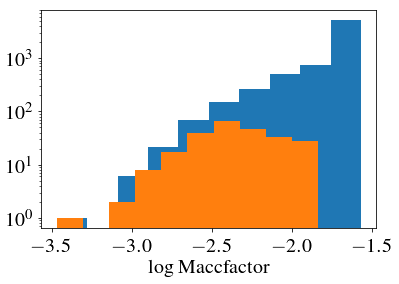

In [135]:
# I am now going to use a function to get the M_acc_factor
M_acc_factor = M_acc_fac(mco,mstrip,rstrip,a,wind_profile,alpha)
print M_acc_factor

plt.hist(np.log10(M_acc_factor))
plt.hist(np.log10(M_acc_factor[mco == 1.4]))
plt.yscale('log')
plt.xlabel('log Maccfactor')
print np.min(M_acc_factor[mco == 1.4]), np.max(M_acc_factor[mco == 1.4])

"""
# This is what I calculate following the accretion physics book
vwind = 1.5* ((2.*G_SI*mstrip*Msun_SI/(rstrip*Rsun_SI))**0.5)  # Going to use 1.5 vesc
v_NS = (G_SI*(mco+mstrip)*Msun_SI/(a*Rsun_SI))**0.5
vrel = ((v_NS**2.) + (vwind**2.))**0.5
M_acc_factor_book = ((G_SI*mco*Msun_SI/(a*Rsun_SI))**2.)/((vrel**3.)*vwind)
print np.min(M_acc_factor_book[mco == 1.4]), np.max(M_acc_factor_book[mco == 1.4])
plt.hist(np.log10(M_acc_factor_book[mco==1.4]))
"""

In [152]:
# From that, we can get the mass accretion rate
M_dot_acc = mdot_wind*M_acc_factor

# But, we want to account for systems that are mass transferring
# I will assume that these funnel all wind mass loss to the compact object
M_dot_acc[MT=='True'] = mdot_wind[MT=='True']

# Need to calculate Eddington accretion rate 
M_dot_Edd = calculate_Mdot_edd(mco)
ind_Edd = M_dot_acc > 0.1*M_dot_Edd
ind_ADAF = M_dot_acc <= 0.1*M_dot_Edd

epsilon = calculate_ADAF_efficiency(M_dot_acc, calculate_Mdot_edd(mco), delta)
epsilon[ind_Edd] = 1.   # Fragos+08 for NS surface accretion epsilon = 1.

# Calculate the X-ray luminosity
LX = L_X_ray(mco, mstrip, rstrip, a, mdot_wind, r_acc, MT=='True', wind_profile, epsilon, alpha)

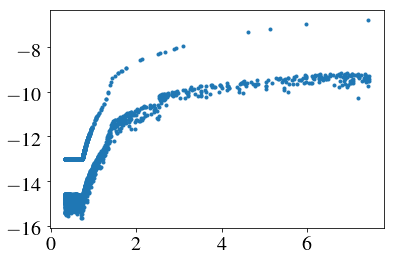

In [153]:
plt.plot(mstrip,np.log10(M_dot_acc),'.')

24.45922380495219 34.86751297557636
-18.321201915446704 -8.144096519721678

34.404754042308156 39.2687227274345
-9.26146347261509 -4.823738407744351



Text(0,0.5,'$\\log_{10} L_X$ [erg/s]')

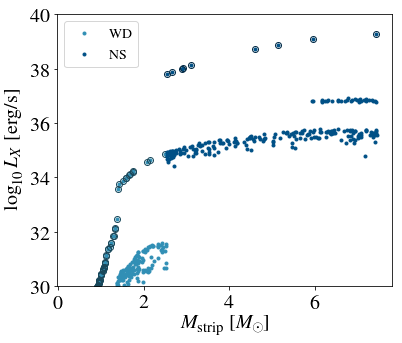

In [157]:
# Here is the X-ray luminosities
LXray_cgs = LX[0]   # erg/s 

d = dist*u.pc.to(u.cm)
FXray_cgs = LXray_cgs/(4.*np.pi*(d**2.))

ind_WD = (mco <= 0.6)
print np.log10(np.min(LXray_cgs[ind_WD])), np.log10(np.max(LXray_cgs[ind_WD]))
print np.log10(np.min(FXray_cgs[ind_WD])), np.log10(np.max(FXray_cgs[ind_WD]))
print ''
ind_NS = (mco == 1.4)
print np.log10(np.min(LXray_cgs[ind_NS])), np.log10(np.max(LXray_cgs[ind_NS]))
print np.log10(np.min(FXray_cgs[ind_NS])), np.log10(np.max(FXray_cgs[ind_NS]))
print ''


hh = 5
ww = 6
fig, ax = plt.subplots(1,1, figsize=(ww,hh))

clr_WD = np.array([49,143,181])/255.
clr_NS = np.array([0,80,134])/255.

ax.plot(mstrip[ind_WD],np.log10(LXray_cgs[ind_WD]),'.',color=clr_WD,label='WD')
ax.plot(mstrip[ind_WD*(MT=='True')],np.log10(LXray_cgs[ind_WD*(MT=='True')]),'o',
        markerfacecolor='none',markeredgecolor=0.5*clr_WD)

ax.plot(mstrip[ind_NS],np.log10(LXray_cgs[ind_NS]),'.',color=clr_NS,label='NS')
ax.plot(mstrip[ind_NS*(MT=='True')],np.log10(LXray_cgs[ind_NS*(MT=='True')]),'o',
        markerfacecolor='none',markeredgecolor=0.5*clr_NS)
#ax.plot(mstrip[ind_NS*ind_Edd],np.log10(LXray_cgs[ind_NS*ind_Edd]),'o',
#        markerfacecolor='none',markeredgecolor='r')


plt.ylim([30,40])

ax.legend(loc=0,fontsize=0.7*fsize)
ax.set_xlabel('$M_{\\mathrm{strip}}$ [$M_{\\odot}$]')
ax.set_ylabel('$\\log_{10} L_X$ [erg/s]')

(array([ 26.,  73., 101.,   0.,  20.,  11.,   1.,   4.,   1.,   3.]),
 array([34.40475404, 34.89115091, 35.37754778, 35.86394465, 36.35034152,
        36.83673838, 37.32313525, 37.80953212, 38.29592899, 38.78232586,
        39.26872273]),
 <a list of 10 Patch objects>)

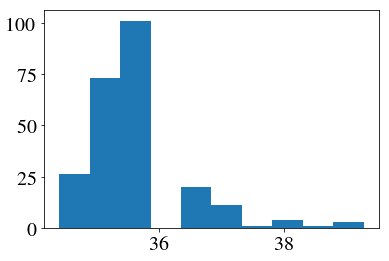

In [146]:
ind = (mco <= 0.6)
ind = (mco > 0.6)
plt.hist(np.log10(LXray_cgs[ind]))

What to do about all those white dwarf systems that are undergoing mass transfer? 

I will follow Nelemans+04

In [105]:
# I will start by assuming that the mass transfer rate is very low, like 1e-9 Msun/yr
Mdot_acc = copy.copy(mdot_wind) #1e-9   
Mdot_acc_cgs = Mdot_acc*u.M_sun.to(u.g)/(u.year.to(u.s))

# Calculte the accretion luminosity
M_CO_cgs = mco*u.M_sun.to(u.g)
R_CO_cgs = r_acc*u.m.to(u.cm)
R_CO_Rsun = R_CO_cgs*u.cm.to(u.R_sun)
q = mco/mstrip
rL = 0.49*(q**(2./3.))/(0.69*(q**(2./3.)) + np.log(1.+(q**(1./3.))))
#Porb = .1    # day
a = ((Porb**2.)*(G*(mstrip+mco)/(4.*(np.pi**2.))))**(1./3.)   # AU
RL_CO = (rL*a)*u.AU.to(u.R_sun)
RL_CO_cgs = RL_CO*u.R_sun.to(u.cm)

Lacc_cgs = 0.5*G_cgs*M_CO_cgs*Mdot_acc_cgs*((1./R_CO_cgs) - (1./RL_CO_cgs))   # erg/s
Lacc_Lsun = Lacc_cgs*(u.erg/u.s).to(u.L_sun)

# Calculate the temperature of the assumed blackbody
Tsun = 5778.  # K
f = 0.001
Tacc = Tsun*(((1./f)*(R_CO_Rsun**(-2.))*Lacc_Lsun)**(1./4.))
print np.log10(Tacc)

[4.72866297 4.72875533 4.72840071 ... 4.72883018 4.72839938 4.72839898]


In [108]:
E_eV = np.logspace(0,6,1000)   # in eV
E_SI = E_eV*u.eV.to(u.J)       # in J
lambda_SI = h_SI*c_SI/E_SI     # in m

# Get the luminosity between 0.1 and 2.4 keV
Elim_low = 0.1*1e3   # eV
Elim_high = 2.4*1e3  # eV
ind_X = (E_eV > Elim_low)*(E_eV < Elim_high)

LX_cgs_MT = np.zeros(len(Tacc))

for i in range(len(Tacc)):
    # Get the blackbody intensity
    Blambda_X = (2.*h_SI*c_SI/(lambda_SI**5.))/(np.exp(h_SI*c_SI/(lambda_SI*kB_SI*Tacc[i])) - 1.)   # SI units

    d = dist[i]*u.pc.to(u.R_sun) #1e3*u.pc.to(u.R_sun)
    Flambda_X = np.pi*Blambda_X*((R_CO_Rsun[i]/d)**2.)   # J s^-1 m^-2 m^-1
    Llambda_X = 4.*np.pi*((d*u.R_sun.to(u.m))**2.)*Flambda_X   # J s^-1 m^-1

    
    Ltot = np.trapz(Llambda_X[ind_X][::-1],lambda_SI[ind_X][::-1])
    LX_cgs_MT[i] = Ltot*u.J.to(u.erg)
    #print 'X-ray luminosity:', Ltot*u.J.to(u.erg), 'erg/s'
    
    if np.mod(i,10000) == 0:
        print i

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


(array([1.17389e+05, 5.60000e+01, 2.30000e+01, 1.30000e+01, 1.00000e+01,
        7.00000e+00, 5.00000e+00, 8.00000e+00, 6.00000e+00, 4.00000e+00]),
 array([1.25471279e+18, 1.14850646e+28, 2.29701292e+28, 3.44551939e+28,
        4.59402585e+28, 5.74253231e+28, 6.89103877e+28, 8.03954523e+28,
        9.18805170e+28, 1.03365582e+29, 1.14850646e+29]),
 <a list of 10 Patch objects>)

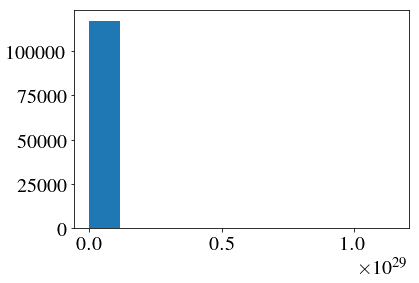

In [109]:
ind = (mco == 0.6)*(MT == 'True')
plt.hist(LX_cgs_MT[ind])

(array([140.,   0.,   0.,   0.,   0.,   0.,   0.,  76., 166., 586.]),
 array([1.82356389e+29, 5.42974175e+29, 9.03591960e+29, 1.26420975e+30,
        1.62482753e+30, 1.98544532e+30, 2.34606310e+30, 2.70668089e+30,
        3.06729867e+30, 3.42791646e+30, 3.78853424e+30]),
 <a list of 10 Patch objects>)

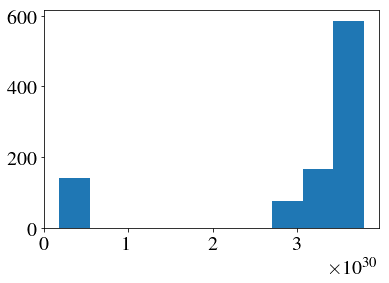

In [110]:
ind = (mco > 1.)*(MT == 'True')
plt.hist(LX_cgs_MT[ind])

3.168808781402895e-08

In [14]:
epsilon = 0.1
X = 0.2
kappa = 0.02*(1+X)   # m^2/kg
k = (4.*np.pi*const.G.value / (epsilon*kappa*const.c.value))   # s^-1
k = k/u.s.to(u.year)
M_CO = 5
Mdot_Edd = k*M_CO
print 'Eddington accretion rate for 5 MSun BH:',k*5,', and for 1.4 Msun NS:',k*1.4

Eddington accretion rate for 5 MSun BH: 1.83926073238e-07 , and for 1.4 Msun NS: 5.14993005065e-08


### Calculate the mass transfer rate due to GWs and tides

In [15]:
# This is from the solar metallicity grid of Götberg+18
# Initial masses of the donor stars [Msun]
minit_grid = np.array([2.0,2.21,2.44,2.7,2.99,3.3,3.65,4.04,4.46,4.93,5.45,6.03,6.66,7.37,8.15,9.0,9.96,11.01,12.17,13.45,14.87,16.44,18.17])
# Masses of the stripped stars [Msun]
mstrip_grid = np.array([0.35,0.38,0.44,0.51,0.58,0.66,0.74,0.85,0.97,1.11,1.27,1.43,1.64,1.88,2.17,2.49,2.87,3.32,3.85,4.45,5.12,5.88,6.72])    # MSun
# Radii of the stripped stars [Rsun]
rstrip_grid = np.array([0.16,0.17,0.19,0.21,0.23,0.25,0.26,0.29,0.32,0.36,0.40,0.42,0.46,0.50,0.55,0.59,0.65,0.70,0.76,0.80,0.84,0.87,0.88]) # Rsun

# The duration of the stripped phases (in Myr)
lifetime_stripped_grid = np.array([671.0,414.1,94.6,143.6,76.5,62.9,41.6,28.0,20.0,16.5,10.6,8.0,6.4,4.4,3.4,2.7,2.2,1.7,1.4,1.2,1.0,0.9,0.8]) # Myr
# This index says which models reached central helium exhaustion
ind_finishedHe = np.array([True]*len(lifetime_stripped_grid))
ind_finishedHe[minit_grid==2.44] = False
ind_finishedHe[minit_grid==2.99] = False


In [18]:
# Let's assume that the accretor is a neutron star
M_CO = 1.4 

# Calculate the minimum possible period (stripped star just fills its Roche lobe)
qinv = mstrip_grid/M_CO   # inverse mass ratio
rL = 0.49*(qinv**(2./3.))/(0.69*(qinv**(2./3.))+np.log(1.+(qinv**(1./3.))))
a = rstrip_grid*u.R_sun.to(u.AU)/rL  # in AU
# minimum orbital period in days
Pmin = np.sqrt((a**3.)*4.*(np.pi**2.)/(G*(mstrip_grid+M_CO)))  

# This is going to be P1
P1 = copy.copy(Pmin)
# And the radius of the stripped star is going to be RL1
RL1 = copy.copy(rstrip_grid)

In [74]:
# Get the moment of interia of stripped stars from evolutionary models which provide the structure

# Get all the model names
loc_MESA = '/data001/ygoetberg/taurus/binaries/grids_180117/small_grids/grid_014/'
mods = [name for name in os.listdir(loc_MESA) if (name[0]=='M' and name[1]=='1' and name[-1]!='z')]
# Sort them with mass
nbr_mods = len(mods)
mgrid = np.zeros(nbr_mods)
for i in range(nbr_mods):
    mgrid[i] = np.float_(mods[i].split('M1_')[1].split('q')[0])
ind_sort = np.argsort(mgrid)
mgrid = mgrid[ind_sort]
mods = np.array(mods)[ind_sort]

# Locate the profile that corresponds to XHec = 0.5
col = ['logRho','logR','he4','mass']
Igrid = np.zeros(nbr_mods)
Igrid_09 = np.zeros(nbr_mods)
Igrid_crude = np.zeros(nbr_mods)
mass_interior = [None]*nbr_mods
logR = [None]*nbr_mods
for i in range(nbr_mods):
    data = np.loadtxt(loc_MESA+mods[i]+'/LOGS1/profiles.index',skiprows=1)
    ind_05 = data[:,1] == 105
    ind_09 = data[:,1] == 109
    if np.sum(ind_05) > 1.:
        ind_05 = ind_05[-1]
    if np.sum(ind_09) > 1.:
        ind_09 = ind_09[-1]
    if np.sum(ind_05) == 1.:
        tmp = int(data[ind_05,2])
        prof_name = 'profile'+str(tmp)+'.data'
        
        # Read the density profile and calculate the moment of inertia
        data2 = GetColumnMESA(loc_MESA+mods[i]+'/LOGS1/'+prof_name,col,2)
        # Calculate the moment of inertia of the model
        logRho = data2[col.index('logRho')]
        logR[i] = data2[col.index('logR')]
        he4 = data2[col.index('he4')]
        mass_interior[i] = data2[col.index('mass')]
        
        rho = (10**logRho[::-1])*u.g.to(u.M_sun)/((u.cm.to(u.AU))**3.)
        r = (10**logR[i][::-1])*u.R_sun.to(u.AU)
        Igrid[i] = (8.*np.pi/3.)*np.trapz(rho*(r**4.),r)   # Msun AU^2
        Igrid_crude[i] = 0.2*mstrip_grid[i]*((rstrip_grid[i]*u.R_sun.to(u.AU))**2.)
        print mods[i], prof_name, he4[-1], Igrid[i], Igrid_crude[i], Igrid_crude[i]/Igrid[i]
    else:
        mass_interior[i] = np.zeros(2)
        logR[i] = np.zeros(2)
    
    """
    if np.sum(ind_09) == 1.:
        tmp = int(data[ind_09,2])
        prof_name = 'profile'+str(tmp)+'.data'
        
        # Read the density profile and calculate the moment of inertia
        data2 = GetColumnMESA(loc_MESA+mods[i]+'/LOGS1/'+prof_name,col,2)
        # Calculate the moment of inertia of the model
        logRho = data2[col.index('logRho')]
        logR = data2[col.index('logR')]
        he4 = data2[col.index('he4')]
        
        rho = (10**logRho[::-1])*u.g.to(u.M_sun)/((u.cm.to(u.AU))**3.)
        r = (10**logR[::-1])*u.R_sun.to(u.AU)
        Igrid_09[i] = (8.*np.pi/3.)*np.trapz(rho*(r**4.),r)   # Msun AU^2
        print mods[i], prof_name, he4[-1], Igrid_09[i]
    """

M1_2.0q0.8P5.6Z0.014 profile515.data 0.49987020260049025 3.6210041125974184e-09 3.875530757554332e-08 10.702917304267674
M1_2.44q0.8P6.4Z0.014 profile363.data 0.4996235336832145 7.95266682836236e-09 6.870416356360827e-08 8.639135153830663
M1_2.7q0.8P6.8Z0.014 profile271.data 0.4998899794471339 1.1980688270042446e-08 9.728187753142241e-08 8.11989055542614
M1_3.65q0.8P8.2Z0.014 profile175.data 0.4976929687937469 3.5036652101469544e-08 2.1637226631238605e-07 6.175597648021591
M1_4.04q0.8P8.8Z0.014 profile164.data 0.4968840806825932 5.070437560014858e-08 3.0919901362028054e-07 6.098073587546052
M1_4.46q0.8P9.4Z0.014 profile161.data 0.4863574529576926 7.242717214590974e-08 4.296302668374517e-07 5.931893433198395
M1_4.93q0.8P10.0Z0.014 profile153.data 0.489382163386883 1.0312502176290691e-07 6.22230304306625e-07 6.033747132070283
M1_5.45q0.8P10.7Z0.014 profile146.data 0.47672389939634546 1.4634538006376494e-07 8.789150110882146e-07 6.005758505702453
M1_6.03q0.8P11.2Z0.014 profile140.data 0.4

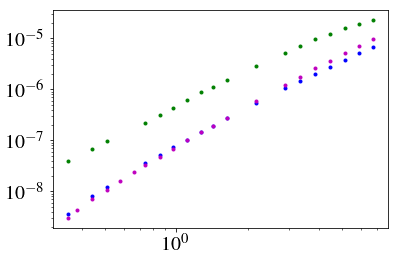

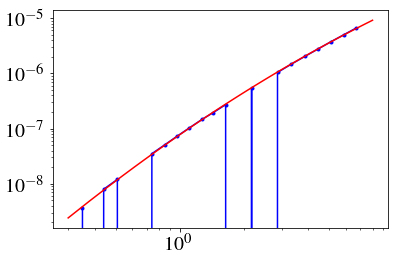

In [21]:
# This shows the difference between the different times during evolution
plt.loglog(mstrip_grid,Igrid,'.b')      # XHec = 0.5 (midway)
#plt.loglog(mstrip_grid,Igrid_09,'.m')   # XHec = 0.9 (early)
#plt.loglog(mstrip_grid,Igrid_crude,'.g')   # Marsh+04
plt.show()

# This shows that it is ok to put a polynomial fit
plt.loglog(mstrip_grid,Igrid,'.b')
plt.loglog(mstrip_grid,Igrid,'-b')
ind_I = Igrid != 0.
coeff_I = np.polyfit(np.log10(mstrip_grid[ind_I]),np.log10(Igrid[ind_I]),2)
mm = np.linspace(0.3,8,100)
fit = 10**np.polyval(coeff_I,np.log10(mm))
plt.loglog(mm,fit,'-r')
plt.show()

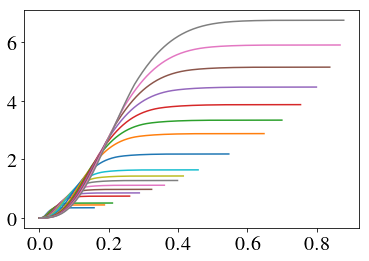

In [76]:
for i in range(nbr_mods):
    if len(logR[i])>2:
        plt.plot(10**logR[i],mass_interior[i])

In [150]:
delta_t = 10**np.interp(np.log10(minit_grid),np.log10(minit_grid[ind_finishedHe]),
                    np.log10(lifetime_stripped_grid[ind_finishedHe])) # Myr
print delta_t
delta_t = 0.2*delta_t*u.Myr.to(u.day)

[671.         414.1        245.30796701 143.6         94.38217478
  62.9         41.6         28.          20.          16.5
  10.6          8.           6.4          4.4          3.4
   2.7          2.2          1.7          1.4          1.2
   1.           0.9          0.8       ]


In [135]:
P1, P2, RL1

(array([0.04350403, 0.0457676 , 0.05030018, 0.05428175, 0.05828206,
        0.06179139, 0.06173027, 0.06755801, 0.07291745, 0.08079777,
        0.08777259, 0.08828516, 0.09350522, 0.09781331, 0.10361203,
        0.10594397, 0.11231521, 0.11469871, 0.11827466, 0.11657533,
        0.11472996, 0.11069549, 0.10336654]),
 array([       nan,        nan,        nan, 0.02786474, 0.04273662,
        0.05331626, 0.055726  , 0.06376581, 0.07028702, 0.07876295,
        0.08650752, 0.0872428 , 0.09265832, 0.09721079, 0.10313779,
        0.10553927, 0.11198095, 0.11441951, 0.11802995, 0.11633533,
        0.11450155, 0.11045319, 0.10309924]),
 array([0.16, 0.17, 0.19, 0.21, 0.23, 0.25, 0.26, 0.29, 0.32, 0.36, 0.4 ,
        0.42, 0.46, 0.5 , 0.55, 0.59, 0.65, 0.7 , 0.76, 0.8 , 0.84, 0.87,
        0.88]))

In [151]:
# Calculate the new period when accounting for GWs and tides

Istrip = 10**np.polyval(coeff_I,np.log10(mstrip_grid))    # [Msun AU^2]
#I2 = 0.2*M_CO*((0.005*u.R_sun.to(u.AU))**2.)
I2 = 0.    # Removing the tides on neutron stars and black holes


# Orbital frequency
Omega = 1./P1   # day^-1

# Stellar angular momentum
Jstar = (Istrip + I2)*Omega

# Orbital angular momentum 
a = ((P1**2.)*G*(mstrip_grid+M_CO)/(4.*(np.pi**2.)))**(1./3.)   # AU
Jorb = np.sqrt(G*a/(mstrip_grid+M_CO))*mstrip_grid*M_CO 


M = mstrip_grid+M_CO   # Total mass of the system 
# Constants
C1 = (-96./5.)*((G**3.)/(c_AUday**5.))*(mstrip_grid*M_CO*M)/((G*M/(4.*(np.pi**2.)))**(4./3.))
C2 = 1. + (1./(1.-3.*Jstar/Jorb))
C = C1*C2
D = (3./8.)*(P1**(8./3.))

# Get the new orbital periods
P2 = ((2.**(9./8.))/(3.**(3./8.)))*((C*delta_t + D)**(3./8.))

/home/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in power


$\dfrac{P^2}{a^3} = \dfrac{4\pi^2}{G(M_1+M_2)}$

In [152]:
# Now, we go back to Roche-lobe radius
a2 = ((P2**2.)*G*(mstrip_grid+M_CO)/(4.*(np.pi**2.)))**(1./3.)   # AU
# Assuming for this that no mass is lost or transferred
qinv = mstrip_grid/M_CO   # inverse mass ratio
rL = 0.49*(qinv**(2./3.))/(0.69*(qinv**(2./3.))+np.log(1.+(qinv**(1./3.))))
RL2 = a2*rL*u.AU.to(u.R_sun)
print zip(RL1,RL2)

[(0.16, nan), (0.17, nan), (0.19, nan), (0.21, nan), (0.23, nan), (0.25, 0.1922249839568107), (0.26, 0.2210393563624492), (0.29, 0.2666194143471495), (0.32, 0.30389131105295447), (0.36, 0.34753092883883213), (0.4, 0.39217864092083127), (0.42, 0.41329423960363454), (0.46, 0.4543847257330083), (0.5, 0.4958634306639888), (0.55, 0.5466253700572726), (0.59, 0.5869814913670409), (0.65, 0.6474117047166257), (0.7, 0.6977215665105336), (0.76, 0.7578982778901991), (0.8, 0.7977987024736527), (0.84, 0.8377650865291104), (0.87, 0.86745430891266), (0.88, 0.876956511002328)]


In [153]:
ind_tmp = np.isnan(RL2)
RL2[ind_tmp] = np.interp(RL1[ind_tmp],RL1[ind_tmp==False],RL2[ind_tmp==False])
print RL2

[0.19222498 0.19222498 0.19222498 0.19222498 0.19222498 0.19222498
 0.22103936 0.26661941 0.30389131 0.34753093 0.39217864 0.41329424
 0.45438473 0.49586343 0.54662537 0.58698149 0.6474117  0.69772157
 0.75789828 0.7977987  0.83776509 0.86745431 0.87695651]


In [154]:
# Calculate the mass transfer rate
#rho_MSunRsun = rho_tmp*u.g.to(u.M_sun)/((u.cm.to(u.R_sun))**3.)
#delta_M = (4.*np.pi*rho_MSunRsun/3.)*((RL1**3.)-(RL2**3.))

mstrip_grid_1 = np.zeros(nbr_mods)
mstrip_grid_2 = np.zeros(nbr_mods)
for i in range(nbr_mods):
    if (len(logR[i])>2):
        mstrip_grid_1[i] = np.max(mass_interior[i][10**logR[i] < RL1[i]])
        if (RL2[i] != 0.):
            mstrip_grid_2[i] = np.max(mass_interior[i][10**logR[i]<RL2[i]])
        


In [155]:
RL1, RL2

(array([0.16, 0.17, 0.19, 0.21, 0.23, 0.25, 0.26, 0.29, 0.32, 0.36, 0.4 ,
        0.42, 0.46, 0.5 , 0.55, 0.59, 0.65, 0.7 , 0.76, 0.8 , 0.84, 0.87,
        0.88]),
 array([0.19222498, 0.19222498, 0.19222498, 0.19222498, 0.19222498,
        0.19222498, 0.22103936, 0.26661941, 0.30389131, 0.34753093,
        0.39217864, 0.41329424, 0.45438473, 0.49586343, 0.54662537,
        0.58698149, 0.6474117 , 0.69772157, 0.75789828, 0.7977987 ,
        0.83776509, 0.86745431, 0.87695651]))

In [156]:
ind_tmp = mstrip_grid_1 > 0.
mstrip_grid_1 = np.interp(mstrip_grid, mstrip_grid[ind_tmp],mstrip_grid_1[ind_tmp])
ind_tmp = mstrip_grid_2 > 0.
mstrip_grid_2 = np.interp(mstrip_grid, mstrip_grid[ind_tmp],mstrip_grid_2[ind_tmp])

In [157]:
mstrip_grid

array([0.35, 0.38, 0.44, 0.51, 0.58, 0.66, 0.74, 0.85, 0.97, 1.11, 1.27,
       1.43, 1.64, 1.88, 2.17, 2.49, 2.87, 3.32, 3.85, 4.45, 5.12, 5.88,
       6.72])

/home/ygoetberg/anaconda3/envs/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0,0.5,'log Mdot [Msun/yr]')

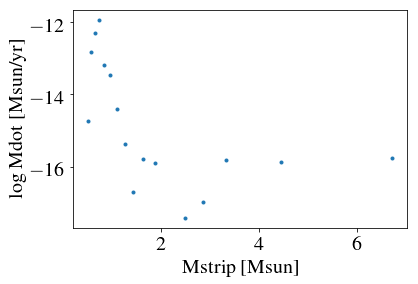

In [159]:
delta_M = mstrip_grid_1-mstrip_grid_2
Mdot_GWtides = delta_M/(delta_t*u.day.to(u.year))

plt.plot(mstrip_grid,np.log10(Mdot_GWtides),'.')
plt.xlabel('Mstrip [Msun]')
plt.ylabel('log Mdot [Msun/yr]')

I think the above figure shows that GWs and tides are not super efficient in tightening the system and they don't give rise to much mass transfer. I think for the more massive systems (with NS and BH companions), we can assume that $\dot{M} \lesssim 10^{-16} M_{\odot}/$yr, which is much lower than even the wind mass loss rate. Did I calculate correctly?

I think we can safely claim that the systems during mass transfer are not going to show anything extra - they will not be ULXs or something like that. We should just go for the Bondi-Hoyle mass accretion for all of them, the wind does all this. Maybe the wind will be funneled. That might increase the mass accretion rate. 